In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [38]:
def plot_stuff(df):
    fig, axs = plt.subplots(2, 1, figsize=(8, 5))
    
    # Plotting rates
    for i, column in enumerate(['RateRoll', 'RatePitch', 'RateYaw']):
        axs[0].plot(df['Timestamp'], df[column], label=column)
    axs[0].set_title('Rates')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Rates')
    axs[0].set_ylim(-100, 100)
    axs[0].legend()
    
    # Plotting accelerations
    #for i, column in enumerate(['AccX', 'AccY', 'AccZ', 'AccForward']):
    axs[1].plot(df['Timestamp'], df["AccForward"], label=column)
    axs[1].set_title('Accelerations')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Accelerations')
    # axs[1].set_ylim(-8, 8)
    axs[1].legend()
    
    plt.tight_layout()
    plt.show() 

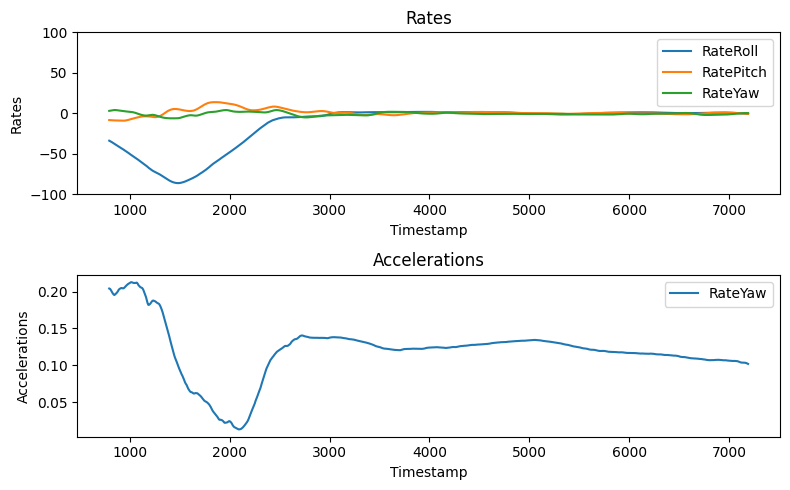

In [48]:
df = pd.read_csv('data-right-turn-bike.csv', names=['Timestamp', 'RateRoll', 'RatePitch', 'RateYaw', 'AccX', 'AccY', 'AccZ'], header=None)
df['Timestamp'] -= df['Timestamp'][0]


# smooth out all columns
for column in ['RateRoll', 'RatePitch', 'RateYaw', 'AccX', 'AccY', 'AccZ']:
    df[column] = df[column].rolling(window=100).mean()



degree = 54

df['AccY'] = (df['AccY'] + 9.81 * np.sin( degree * np.pi / 180))
df['AccZ'] = (df['AccZ'] + 9.81 * np.cos( degree * np.pi / 180))
df['AccForward'] = df['AccY'] * np.cos( degree * np.pi / 180) - df['AccZ'] * np.sin( degree * np.pi / 180)





plot_stuff(df)

# plot_stuff(df)